In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import numpy as np
import flappy_bird_gymnasium

env = gym.make(
    "FlappyBird-v0", audio_on=False, render_mode="rgb_array", use_lidar=False
)

# Introduction to the Environment
A DQN agent will be trained to play the game of Flappy Bird.

### Action space
* 0 - **do nothing**
* 1 - **flap**

### Rewards
* +0.1 - **every frame it stays alive**
* +1.0 - **successfully passing a pipe**
* -1.0 - **dying**
* −0.5 - **touch the top of the screen**

### State Space
The environment offers two options for the state space but we will not use those options. We will instead use the RGB image from env.render() as our observation.

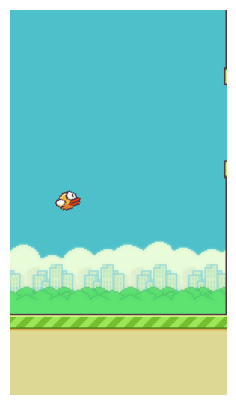

In [3]:
from IPython.display import HTML
from utils import *
frames = []
s, _ = env.reset()

while True:
    a = env.action_space.sample()
    s, r, terminated, truncated, info = env.step(a)
    rgb_image = env.render()
    frames.append(rgb_image)
    if terminated or truncated:
        break

anim = animate(frames)
HTML(anim.to_jshtml())

From playing the animation, we see that the game starts immediately. Thus we set the default of initial_no_op in the environment wrapper to 0.

In [5]:
# Checking the dimensions of the frames so we can correctly initialize the observation space in the environment wrapper.
print(frames[0].shape)

(512, 288, 3)


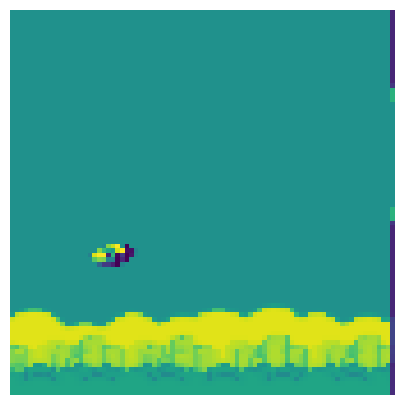

In [6]:
from utils import *
for i in range(len(frames)):
    frames[i] = preprocess(frames[i])
anim = animate(frames)
HTML(anim.to_jshtml())

REMEMBER TO CROP AND RESIZE EACH FRAME before we pass it into our Q-network, which is a CNN that accepts images of 84x84. This should be handled inside env_wrapper.py and utils.py.

# DQN Time!